In [1]:
# import dependencies 
import csv
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import scipy.stats as st

In [2]:
# get file paths
file_path = "Resources/cleaned_df.csv"
cleaned_df = pd.read_csv(file_path)
cleaned_df

,timestamp,open,high,low,close,volume,Ticker,Sector
0,2014-12-31,85.88,91.94,81.660,89.310,62647413,ACN,Information Technology
1,2014-12-31,73.41,75.66,70.780,72.200,150299734,MDT,Health Care
2,2014-12-31,148.61,152.94,144.750,150.150,93432673,BRK.B,Financials
3,2014-12-31,46.46,49.68,44.910,47.710,38554847,O,Real Estate
4,2014-12-31,27.50,28.59,26.150,27.815,577451832,CSCO,Information Technology
...,...,...,...,...,...,...,...,...
6737,2020-07-02,126.60,127.17,124.670,125.810,8821479,TXN,Information Technology
6738,2020-07-02,63.75,65.41,63.660,64.430,1589739,BF-B,Consumer Staples
6739,2020-07-02,27.50,29.46,27.280,28.470,8471003,PEAK,Real Estate
6740,2020-07-02,42.15,42.77,40.750,41.980,14948347,WBA,Consumer Staples


In [3]:
# create financial sector from main csv

fin_sector = cleaned_df.loc[cleaned_df['Sector']== "Financials"]
fin_sector = fin_sector.sort_values(by=["Ticker","timestamp"])
fin_sector

,timestamp,open,high,low,close,volume,Ticker,Sector
38,2014-12-31,92.2800,98.10,91.840,94.83,34989171,AON,Financials
140,2015-01-30,95.4900,96.30,89.350,90.05,23780417,AON,Financials
230,2015-02-27,90.3600,101.30,89.650,100.36,25113506,AON,Financials
382,2015-03-31,100.3200,101.00,95.294,96.12,23736678,AON,Financials
415,2015-04-30,95.8400,99.03,95.320,96.23,21570149,AON,Financials
...,...,...,...,...,...,...,...,...
6275,2020-03-31,40.9800,42.90,25.105,28.70,1113269738,WFC,Financials
6429,2020-04-30,27.0197,33.91,25.910,29.05,866529143,WFC,Financials
6483,2020-05-29,28.5000,28.53,22.000,26.47,1053964154,WFC,Financials
6623,2020-06-30,26.6100,33.89,25.170,25.60,1220237005,WFC,Financials


In [4]:
grouped_fin = fin_sector.groupby(fin_sector['Ticker'])
grouped_fin['open'].mean()

Ticker
AON      137.391029
AXP       90.031176
BAC       23.388824
BLK      420.514632
BRK.B    175.892500
C         60.007647
CB       130.881985
CME      139.824412
GS       205.204412
ICE      135.296471
JPM       90.248824
MCO      147.049265
MMC       77.673971
MS        41.366029
PGR       50.711029
PNC      117.465441
SPGI     166.283382
TFC       44.244559
USB       48.221618
WFC       51.065804
Name: open, dtype: float64

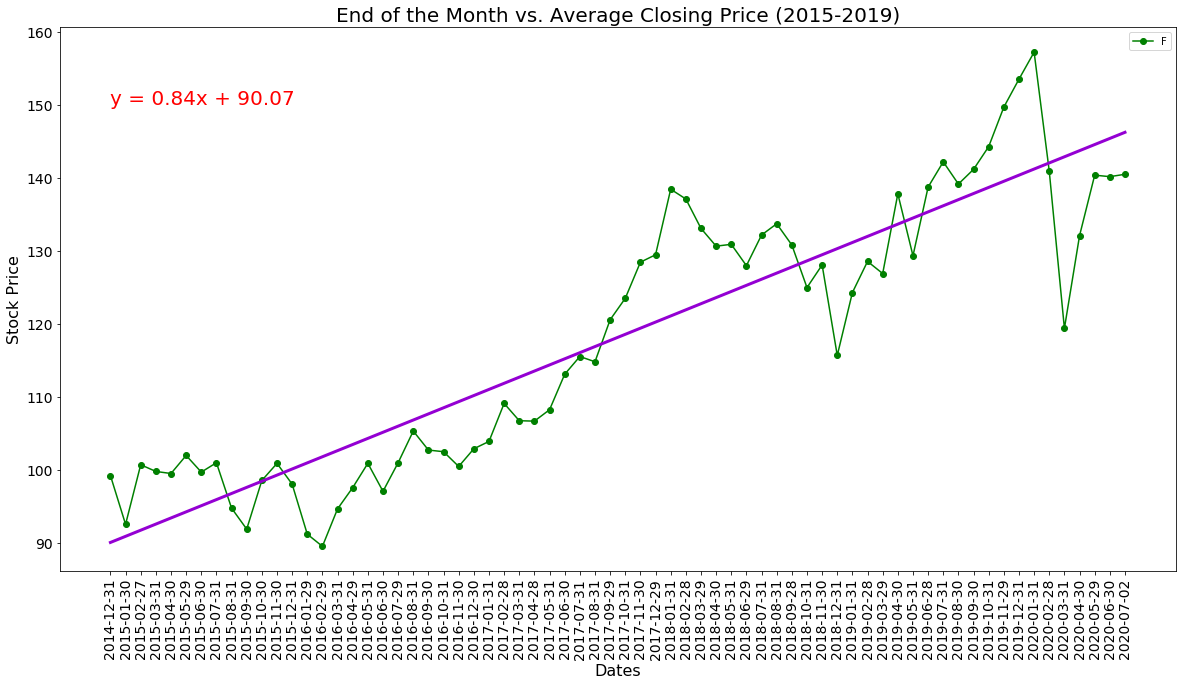

In [6]:
# Finding the average stock price of health care stock based on the close price
avg_fin_df = pd.DataFrame(fin_sector.groupby(['timestamp'])['close'].mean()).reset_index()

x_values = avg_fin_df['timestamp']
y_values = avg_fin_df['close']

x_val = range(68)

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_values)

# Create equation of line to calculate predicted 
regress_values = x_val * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

fig, ax = plt.subplots(figsize=(20, 10))

# Create a scatter plot
plt.plot(x_values, y_values, marker='o',color='green')
plt.legend(labels='Financial',loc='best')

# Add the linear regression equation and line to plot on top of the scatter plot
plt.plot(x_values, regress_values, linewidth=3, color='darkviolet')
plt.annotate(line_eq, (0, 150), fontsize=20, color='red')

# Rotate tick marks
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
# Create a title and labels for x and y axis
plt.title('End of the Month vs. Average Closing Price (2015-2019)', fontsize=20)
plt.xlabel('Dates', fontsize=16)
plt.ylabel('Stock Price', fontsize=16)

# Save and show the graph

plt.show()

In [10]:
avg_fin_df.tail(30)

,timestamp,close
38,2018-02-28,137.0860
39,2018-03-29,133.0595
40,2018-04-30,130.6295
41,2018-05-31,130.8795
42,2018-06-29,127.9600
43,2018-07-31,132.1515
44,2018-08-31,133.6965
45,2018-09-28,130.7875
46,2018-10-31,124.9605
47,2018-11-30,128.0585


In [11]:
dates = ['2014-12-31','2015-03-31','2015-06-30','2015-9-30',
        '2015-12-31','2016-03-31','2016-06-30','2016-9-30',
        '2016-12-30','2017-03-31','2017-06-30','2017-9-29',
        '2017-12-29','2018-03-29','2018-06-29','2018-9-30',
        '2018-12-31','2019-03-29','2019-06-28','2019-9-30',
        '2019-12-31','2020-03-31',
        ]


In [12]:
dated_df = cleaned_df[cleaned_df['timestamp'].isin(dates)]
#dated_df = cleaned_df.loc[cleaned_df['timestamp']== '2015-04-30']
dated_df


,timestamp,open,high,low,close,volume,Ticker,Sector
0,2014-12-31,85.88,91.94,81.6600,89.310,62647413,ACN,Information Technology
1,2014-12-31,73.41,75.66,70.7800,72.200,150299734,MDT,Health Care
2,2014-12-31,148.61,152.94,144.7500,150.150,93432673,BRK.B,Financials
3,2014-12-31,46.46,49.68,44.9100,47.710,38554847,O,Real Estate
4,2014-12-31,27.50,28.59,26.1500,27.815,577451832,CSCO,Information Technology
...,...,...,...,...,...,...,...,...
6339,2020-03-31,134.78,143.64,109.1600,131.130,355130991,JNJ,Health Care
6340,2020-03-31,52.63,58.13,41.1900,50.080,286699029,MDLZ,Consumer Staples
6341,2020-03-31,276.90,284.89,180.6807,263.600,394309113,NVDA,Information Technology
6342,2020-03-31,198.46,224.56,131.8000,172.910,77844653,CME,Financials


In [ ]:
cleaned_df.to_csv("Resources/", index=False)